![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Sierra Mecalo-Schwigen
***

## Overview

With the growing success of the movie industry, Microsoft has made the decision to start their own movie studio. In order to assist them in determining which genre of movie to select
for their first film, analysis of movie production data must be completed. The analysis of data from IMDB and The Numbers will be used to determine the success of movies in
dollars spent vs. dollars earned. Results of the analysis can be used to strategically select which movie genre Microsoft should consider creating to optimize potential profits.

## Business Problem

This analysis will be examining which movie genre provides the highest profit potential. The guiding questions to be used are:
***
1. What is the highest grossing genres?
2. Which of those genres provides the highest return on investment?
3. Is there a correlation between movie run time and ROl?
***

## Data Understanding

Scraped data from IMDB and The Numbers will be used for this analysis. These are reputable databases that provide information on the movie industry.
The data scraped from IMDB includes movie title, runtime in minutes,
and movie genre. The data scraped from The Numbers includes movie title, production budget, domestic gross revenue, and worldwide gross revenue.
The Python library CPI will also be used to adjust for inflation using the Consumer Price Index.

-Fix-
***
Questions to consider:
Where did the data come from, and how do they relate to the data analysis questions?
• What do the data represent? Who is in the sample and what variables are included?
What is the target variable?
What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import cpi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# IMDB Title Basics Data

df_imdb_titles = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz")
df_imdb_titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
df_imdb_titles.info()
# will need to select between primary_title and original_title
# will need to identify missing values in genres column and runtime_minutes column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
# The Numbers Movie Budgets Data

df_tn_budgets = pd.read_csv("data/zippedData/tn.movie_budgets.csv.gz")
df_tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
df_tn_budgets.info()
# need to convert production_budget, domestic_gross, and worldwide_gross to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

I started by merging the datasets on the Primary Title and Movie columns. Then I dropped unnecessary
columns from the dataframe. After referring to the above dataframes information, I converted the production budget, domestic gross, and worldwide gross columns to float data types. Once this was complete I checked the merged dataset for missing values and decided to drop entries that were missing information in the 'genres' column. For entries containing multipe genres, I exploded those into individual entries for each genre specified. I checked for movies missing information in the worldwide gross column and removed those from the dataframe. I then added a column that subtracts production budget from worldwide gross to determine the profit earned, and sorted in descending order.

In [6]:
# merge datasets
df_master = df_imdb_titles.merge(df_tn_budgets, 
                                  left_on='primary_title', 
                                  right_on='movie') 
df_master

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,"$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008",Fuel,"$2,500,000","$174,255","$174,255"
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982",Diner,"$5,000,000","$12,592,907","$12,592,907"
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008",Traitor,"$22,000,000","$23,530,831","$27,882,226"
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,"Oct 29, 2004",Ray,"$40,000,000","$75,305,995","$124,823,094"


In [7]:
# drop unnecessary columns
df_master.drop(columns=['tconst', 'original_title', 'id', 'movie', 'start_year'], inplace=True)
df_master

,primary_title,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,91.0,"Action,Animation,Comedy","Dec 31, 2012","$45,000,000",$0,"$73,706"
1,Mortal Kombat,NaN,"Action,Adventure,Fantasy","Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227"
2,The Overnight,88.0,NaN,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,The Overnight,79.0,"Comedy,Mystery","Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
4,On the Road,124.0,"Adventure,Drama,Romance","Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...
3810,Fuel,NaN,"Documentary,Sport","Nov 14, 2008","$2,500,000","$174,255","$174,255"
3811,Diner,NaN,Crime,"Apr 2, 1982","$5,000,000","$12,592,907","$12,592,907"
3812,Traitor,110.0,"Action,Drama,Romance","Aug 27, 2008","$22,000,000","$23,530,831","$27,882,226"
3813,Ray,111.0,Crime,"Oct 29, 2004","$40,000,000","$75,305,995","$124,823,094"


In [8]:
# convert production_budget, domestic_gross, and worldwide_gross to float
df_master[df_master.columns[4:7]] = df_master[df_master.columns[4:7]].replace('[\$,]', '', 
                                                                              regex=True).astype(float)

In [9]:
# check for missing data
df_master.isna().sum()

primary_title          0
runtime_minutes      487
genres                72
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

In [10]:
# drop movies missing genre
df_master.dropna(axis=0, subset=['genres'])

,primary_title,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,91.0,"Action,Animation,Comedy","Dec 31, 2012",45000000.0,0.0,73706.0
1,Mortal Kombat,NaN,"Action,Adventure,Fantasy","Aug 18, 1995",20000000.0,70433227.0,122133227.0
3,The Overnight,79.0,"Comedy,Mystery","Jun 19, 2015",200000.0,1109808.0,1165996.0
4,On the Road,124.0,"Adventure,Drama,Romance","Mar 22, 2013",25000000.0,720828.0,9313302.0
5,On the Road,90.0,Drama,"Mar 22, 2013",25000000.0,720828.0,9313302.0
...,...,...,...,...,...,...,...
3810,Fuel,NaN,"Documentary,Sport","Nov 14, 2008",2500000.0,174255.0,174255.0
3811,Diner,NaN,Crime,"Apr 2, 1982",5000000.0,12592907.0,12592907.0
3812,Traitor,110.0,"Action,Drama,Romance","Aug 27, 2008",22000000.0,23530831.0,27882226.0
3813,Ray,111.0,Crime,"Oct 29, 2004",40000000.0,75305995.0,124823094.0


In [11]:
# split multiple genres into individual rows
df_master['genres'] = df_master['genres'].str.strip().str.split(',')
df_master = df_master.explode('genres')
df_master.head()

,primary_title,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,91.0,Action,"Dec 31, 2012",45000000.0,0.0,73706.0
0,Foodfight!,91.0,Animation,"Dec 31, 2012",45000000.0,0.0,73706.0
0,Foodfight!,91.0,Comedy,"Dec 31, 2012",45000000.0,0.0,73706.0
1,Mortal Kombat,NaN,Action,"Aug 18, 1995",20000000.0,70433227.0,122133227.0
1,Mortal Kombat,NaN,Adventure,"Aug 18, 1995",20000000.0,70433227.0,122133227.0


In [12]:
# check for missing worldwide_gross values
df_master[(df_master['worldwide_gross']==0)]

,primary_title,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross
16,Anderson's Cross,98.0,Comedy,"Dec 31, 2010",300000.0,0.0,0.0
16,Anderson's Cross,98.0,Drama,"Dec 31, 2010",300000.0,0.0,0.0
16,Anderson's Cross,98.0,Romance,"Dec 31, 2010",300000.0,0.0,0.0
43,House at the End of the Drive,91.0,Horror,"Dec 31, 2014",1400000.0,0.0,0.0
43,House at the End of the Drive,91.0,Thriller,"Dec 31, 2014",1400000.0,0.0,0.0
...,...,...,...,...,...,...,...
3772,Blinded by the Light,117.0,Comedy,"Aug 14, 2019",15000000.0,0.0,0.0
3772,Blinded by the Light,117.0,Drama,"Aug 14, 2019",15000000.0,0.0,0.0
3783,The Deported,NaN,Documentary,"Dec 31, 2009",3000000.0,0.0,0.0
3808,The Magic Flute,NaN,Music,"Dec 31, 2006",27000000.0,0.0,0.0


In [13]:
# remove movies missing worldwide_gross data
df_master = df_master.loc[df_master['worldwide_gross'] != 0]

In [14]:
# add row to determine if movie earned a profit
df_master['profit'] = df_master['worldwide_gross']- df_master['production_budget']
df_master

,primary_title,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,Foodfight!,91.0,Action,"Dec 31, 2012",45000000.0,0.0,73706.0,-44926294.0
0,Foodfight!,91.0,Animation,"Dec 31, 2012",45000000.0,0.0,73706.0,-44926294.0
0,Foodfight!,91.0,Comedy,"Dec 31, 2012",45000000.0,0.0,73706.0,-44926294.0
1,Mortal Kombat,NaN,Action,"Aug 18, 1995",20000000.0,70433227.0,122133227.0,102133227.0
1,Mortal Kombat,NaN,Adventure,"Aug 18, 1995",20000000.0,70433227.0,122133227.0,102133227.0
...,...,...,...,...,...,...,...,...
3811,Diner,NaN,Crime,"Apr 2, 1982",5000000.0,12592907.0,12592907.0,7592907.0
3812,Traitor,110.0,Action,"Aug 27, 2008",22000000.0,23530831.0,27882226.0,5882226.0
3812,Traitor,110.0,Drama,"Aug 27, 2008",22000000.0,23530831.0,27882226.0,5882226.0
3812,Traitor,110.0,Romance,"Aug 27, 2008",22000000.0,23530831.0,27882226.0,5882226.0


In [15]:
# order by profit, descending
df_master.sort_values(by='profit', ascending=False)

,primary_title,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,profit
1747,Avatar,93.0,Horror,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,2.351345e+09
2775,Titanic,NaN,Adventure,"Dec 19, 1997",200000000.0,659363944.0,2.208208e+09,2.008208e+09
2776,Titanic,115.0,Family,"Dec 19, 1997",200000000.0,659363944.0,2.208208e+09,2.008208e+09
3360,Avengers: Infinity War,149.0,Sci-Fi,"Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,1.748134e+09
3360,Avengers: Infinity War,149.0,Adventure,"Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,1.748134e+09
...,...,...,...,...,...,...,...,...
792,Mars Needs Moms,88.0,Animation,"Mar 11, 2011",150000000.0,21392758.0,3.954976e+07,-1.104502e+08
792,Mars Needs Moms,88.0,Adventure,"Mar 11, 2011",150000000.0,21392758.0,3.954976e+07,-1.104502e+08
3689,Dark Phoenix,113.0,Adventure,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3689,Dark Phoenix,113.0,Action,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08,-2.002376e+08


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [23]:
# check correlation between production budget and profit
made_profit = df_master[df_master['profit'] > 0]
no_profit = df_master[df_master['profit'] < 0]
pos_profit = made_profit['production_budget'].corr(made_profit['profit'])
neg_profit = no_profit['production_budget'].corr(no_profit['profit'])

print(f'There is a {pos_profit} correlation between production budget and positive profit.')
print(f'There is a {neg_profit} correlation between production budget and negative profit.')

There is a 0.6626208602404426 correlation between production budget and positive profit.
There is a -0.7012440984829406 correlation between production budget and negative profit.


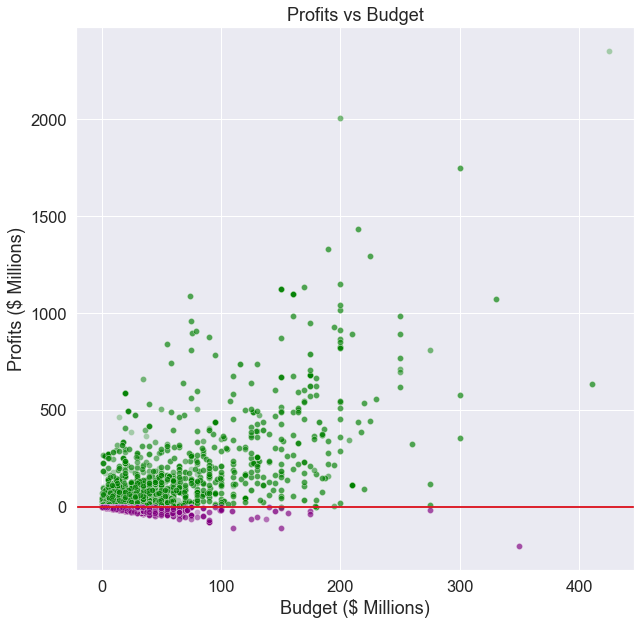

In [27]:
# create graph to visualize correlation data
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

fig, ax = plt.subplots()

graph1 = sns.scatterplot(
    x=made_profit['production_budget']/1000000,
    y= made_profit["profit"]/1000000, 
    color='green', alpha= .3)

graph2 = sns.scatterplot(
    x=no_profit['production_budget']/1000000,
    y= no_profit["profit"]/1000000, 
    color='purple', alpha= .3)

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

graph1.axhline(1)

plt.xlabel('Budget ($ Millions)')
plt.ylabel('Profits ($ Millions)')
plt.title('Profits vs Budget')
ax.axhline(y=1, color= "red")

fig.set_size_inches(10,10)

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***